# PS Processing

In this tutorial, we demostrate how to do PS processing with the decorrelation CLI interface.
The input data for PS processing is prepared in [Load Data](./load_data.ipynb).

In [ ]:
!ls ./load_data

e.zarr	  lat.zarr  meta.toml  phi.zarr    rslc_pyramid  scratch
hgt.zarr  lon.zarr  n.zarr     range.zarr  rslc.zarr	 theta.zarr


## Amplitude dispersion index calculation

Here were calculate the amplitude dispersion index (ADI) which is used to identify persistent scatterers.

In [ ]:
import zarr
import numpy as np
from matplotlib import pyplot as plt
import colorcet
import moraine.cli as mc
import moraine as mr

In [ ]:
rslc = './load_data/rslc.zarr'
adi = './ps_processing/gix/ras_adi.zarr'

In [ ]:
logger = mc.get_logger()

In [ ]:
mc.amp_disp(rslc,adi)

2025-06-24 22:15:48 - log_args - INFO - running function: amp_disp
2025-06-24 22:15:48 - log_args - INFO - fetching args:
2025-06-24 22:15:48 - log_args - INFO - rslc = './load_data/rslc.zarr'
2025-06-24 22:15:48 - log_args - INFO - adi = './ps_processing/gix/ras_adi.zarr'
2025-06-24 22:15:48 - log_args - INFO - chunks = None
2025-06-24 22:15:48 - log_args - INFO - out_chunks = None
2025-06-24 22:15:48 - log_args - INFO - cuda = False
2025-06-24 22:15:48 - log_args - INFO - processes = None
2025-06-24 22:15:48 - log_args - INFO - n_workers = None
2025-06-24 22:15:48 - log_args - INFO - threads_per_worker = None
2025-06-24 22:15:48 - log_args - INFO - rmm_pool_size = 0.9
2025-06-24 22:15:48 - log_args - INFO - dask_cluster_arg = {}
2025-06-24 22:15:48 - log_args - INFO - fetching args done.
2025-06-24 22:15:48 - zarr_info - INFO - ./load_data/rslc.zarr zarray shape, chunks, dtype: (2500, 1834, 17), (1000, 1000, 1), complex64
2025-06-24 22:15:48 - amp_disp - INFO - starting dask local cl

Then visualize the amplitude dispersion index.
Since the data is small, we can visualize it with the API plot module `moraine.plot`.
If you want to reduce the memory consumption, the CLI plot module `moraine.cli.plot`
can be used. But the pyramid should be generated ahead.

In [ ]:
adi_data = zarr.open(adi,'r')[:]
adi_plot = mr.ras_plot(adi_data)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
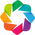

In [ ]:
import holoviews as hv
hv.extension('bokeh')
from bokeh.models import WheelZoomTool
from holoviews import opts

In [ ]:
adi_plot = adi_plot.redim(x=hv.Dimension('r', label='Range'), y=hv.Dimension('az',label='Azimuth'), z=hv.Dimension('adi',range=(0,1)))

In [ ]:
adi_plot.opts(opts.Image(cmap='viridis',width=600, height=600, colorbar=True,
                          invert_yaxis=True,
                          default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],active_tools=['wheel_zoom']))

:DynamicMap   []
   :Image   [r,az]   (adi)

Then we can select PS candidates by setting a threshold to the amplitude dispersion index:

In [ ]:
ps_can_gix = './ps_processing/gix/ps_can_gix.zarr'
mc.pc_logic_ras(adi, ps_can_gix, 'ras<0.3', chunks=20000)

2025-06-24 22:15:52 - log_args - INFO - running function: pc_logic_ras
2025-06-24 22:15:52 - log_args - INFO - fetching args:
2025-06-24 22:15:52 - log_args - INFO - ras = './ps_processing/gix/ras_adi.zarr'
2025-06-24 22:15:52 - log_args - INFO - gix = './ps_processing/gix/ps_can_gix.zarr'
2025-06-24 22:15:52 - log_args - INFO - operation = 'ras<0.3'
2025-06-24 22:15:52 - log_args - INFO - chunks = 20000
2025-06-24 22:15:52 - log_args - INFO - fetching args done.
2025-06-24 22:15:52 - zarr_info - INFO - ./ps_processing/gix/ras_adi.zarr zarray shape, chunks, dtype: (2500, 1834), (1000, 1000), float32
2025-06-24 22:15:52 - pc_logic_ras - INFO - loading ras into memory.
2025-06-24 22:15:52 - pc_logic_ras - INFO - select pc based on operation: ras<0.3
2025-06-24 22:15:52 - pc_logic_ras - INFO - number of selected pixels: 43201.
2025-06-24 22:15:52 - zarr_info - INFO - ./ps_processing/gix/ps_can_gix.zarr zarray shape, chunks, dtype: (43201, 2), (20000, 1), int32
2025-06-24 22:15:52 - pc_log

Then we convert the ps candiates to hillbert coordinates:

In [ ]:
mc.pc_hix('./ps_processing/gix/ps_can_gix.zarr/', './ps_processing/gix/ps_can_hix.zarr', shape=(2500, 1834))
ps_can_hix = './ps_processing/hix/ps_can_hix.zarr'
mc.pc_sort('./ps_processing/gix/ps_can_hix.zarr', ps_can_hix)

2025-06-24 22:15:52 - log_args - INFO - running function: pc_hix
2025-06-24 22:15:52 - log_args - INFO - fetching args:
2025-06-24 22:15:52 - log_args - INFO - gix = './ps_processing/gix/ps_can_gix.zarr/'
2025-06-24 22:15:52 - log_args - INFO - hix = './ps_processing/gix/ps_can_hix.zarr'
2025-06-24 22:15:52 - log_args - INFO - shape = (2500, 1834)
2025-06-24 22:15:52 - log_args - INFO - fetching args done.
2025-06-24 22:15:52 - zarr_info - INFO - ./ps_processing/gix/ps_can_gix.zarr/ zarray shape, chunks, dtype: (43201, 2), (20000, 1), int32
2025-06-24 22:15:52 - zarr_info - INFO - ./ps_processing/gix/ps_can_hix.zarr zarray shape, chunks, dtype: (43201,), (20000,), int64
2025-06-24 22:15:52 - pc_hix - INFO - calculating the hillbert index based on grid index
2025-06-24 22:15:53 - pc_hix - INFO - writing the hillbert index
2025-06-24 22:15:53 - pc_hix - INFO - done.
2025-06-24 22:15:53 - log_args - INFO - running function: pc_sort
2025-06-24 22:15:53 - log_args - INFO - fetching args:
20

In [ ]:
ps_can_rslc = './ps_processing/hix/ps_can_rslc.zarr'
mc.ras2pc(ps_can_hix,
          [rslc,'./load_data/e.zarr','./load_data/n.zarr',
           './load_data/lon.zarr','./load_data/lat.zarr',
           './ps_processing/gix/ras_adi.zarr'],
          [ps_can_rslc, './ps_processing/hix/ps_can_e.zarr','./ps_processing/hix/ps_can_n.zarr',
           './ps_processing/hix/ps_can_lon.zarr', './ps_processing/hix/ps_can_lat.zarr',
           './ps_processing/hix/ps_can_adi.zarr',],
)

2025-06-24 22:15:53 - log_args - INFO - running function: ras2pc
2025-06-24 22:15:53 - log_args - INFO - fetching args:
2025-06-24 22:15:53 - log_args - INFO - idx = './ps_processing/hix/ps_can_hix.zarr'
2025-06-24 22:15:53 - log_args - INFO - ras = ['./load_data/rslc.zarr', './load_data/e.zarr', './load_data/n.zarr', './load_data/lon.zarr', './load_data/lat.zarr', './ps_processing/gix/ras_adi.zarr']
2025-06-24 22:15:53 - log_args - INFO - pc = ['./ps_processing/hix/ps_can_rslc.zarr', './ps_processing/hix/ps_can_e.zarr', './ps_processing/hix/ps_can_n.zarr', './ps_processing/hix/ps_can_lon.zarr', './ps_processing/hix/ps_can_lat.zarr', './ps_processing/hix/ps_can_adi.zarr']
2025-06-24 22:15:53 - log_args - INFO - chunks = None
2025-06-24 22:15:53 - log_args - INFO - processes = False
2025-06-24 22:15:53 - log_args - INFO - n_workers = 1
2025-06-24 22:15:53 - log_args - INFO - threads_per_worker = 1
2025-06-24 22:15:53 - log_args - INFO - dask_cluster_arg = {}
2025-06-24 22:15:53 - log_ar

The point cloud data is sorted according to the hillbert index so they close points in the list are closed to each other in map.

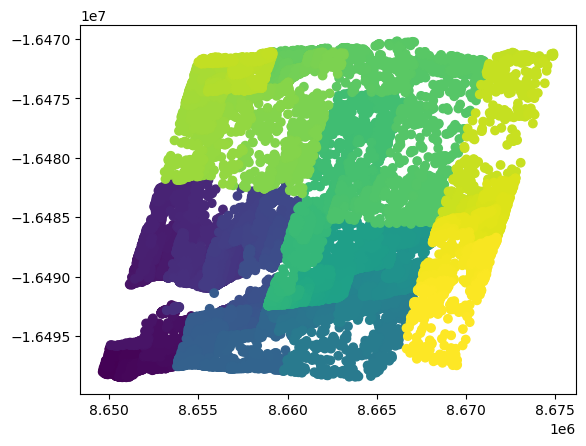

In [ ]:
#| hide
e = zarr.open('./ps_processing/hix/ps_can_e.zarr','r')[:]
n = zarr.open('./ps_processing/hix/ps_can_n.zarr','r')[:]
plt.scatter(n,e,c=np.arange(e.shape[0]))
plt.show()

## visualize the PS

In [ ]:
mc.pc_pyramid(
    './ps_processing/hix/ps_can_rslc.zarr',
    './ps_processing/hix/ps_can_rslc_pyramid',
    x = './ps_processing/hix/ps_can_e.zarr',
    y = './ps_processing/hix/ps_can_n.zarr/',
    ras_resolution = 20,
)

2025-06-24 22:15:57 - log_args - INFO - running function: pc_pyramid
2025-06-24 22:15:57 - log_args - INFO - fetching args:
2025-06-24 22:15:57 - log_args - INFO - pc = './ps_processing/hix/ps_can_rslc.zarr'
2025-06-24 22:15:57 - log_args - INFO - out_dir = './ps_processing/hix/ps_can_rslc_pyramid'
2025-06-24 22:15:57 - log_args - INFO - x = './ps_processing/hix/ps_can_e.zarr'
2025-06-24 22:15:57 - log_args - INFO - y = './ps_processing/hix/ps_can_n.zarr/'
2025-06-24 22:15:57 - log_args - INFO - yx = None
2025-06-24 22:15:57 - log_args - INFO - ras_resolution = 20
2025-06-24 22:15:57 - log_args - INFO - ras_chunks = (256, 256)
2025-06-24 22:15:57 - log_args - INFO - pc_chunks = 65536
2025-06-24 22:15:57 - log_args - INFO - processes = False
2025-06-24 22:15:57 - log_args - INFO - n_workers = 1
2025-06-24 22:15:57 - log_args - INFO - threads_per_worker = 2
2025-06-24 22:15:57 - log_args - INFO - dask_cluster_arg = {}
2025-06-24 22:15:57 - log_args - INFO - fetching args done.
2025-06-24

In [ ]:
intf_plot = mc.pc_plot('./ps_processing/hix/ps_can_rslc_pyramid/',post_proc_ras='intf_all', post_proc_pc='intf_all',level_increase=1)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
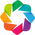

In [ ]:
import holoviews as hv
from bokeh.models import WheelZoomTool
hv.extension('bokeh')
import toml
with open('load_data/meta.toml','r') as f:
    dates = toml.load(f)['dates']
intf_plot = intf_plot.redim(i=hv.Dimension('i', label='Reference Image', range=(0,16), value_format=(lambda i: dates[i])),
                            j=hv.Dimension('j', label='Secondary Image', range=(0,16), value_format=(lambda i: dates[i])),
                            x=hv.Dimension('lon', label='Longitude'), y=hv.Dimension('lat',label='Latitude'), z=hv.Dimension('Phase',range=(-np.pi,np.pi)))

In [ ]:
hv.output(widget_location='bottom')
hv.element.tiles.EsriImagery()*intf_plot.opts(
    hv.opts.Image(
        cmap='colorwheel',width=600, height=400, colorbar=True,
        default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],
        active_tools=['wheel_zoom']
    ),
    hv.opts.Points(
        color='Phase', cmap='colorwheel',width=600, height=400, colorbar=True,
        default_tools=['pan',WheelZoomTool(zoom_on_axis=False),'save','reset','hover'],
        active_tools=['wheel_zoom']
    ),
)

:DynamicMap   [i,j]
   :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Image.I  :Image   [lon,lat]   (Phase,idx)
      .Points.I :Points   [lon,lat]   (Phase,idx)